## Abstract

Como educador, me interesa entender qué factores influyen en el rendimiento académico de los estudiantes para mejorar la calidad educativa y el proceso de aprendizaje.

### Contexto Comercial
Este proyecto busca demostrar cómo un análisis de datos puede aplicarse en educación usando un dataset público. En el futuro, este trabajo servirá de base para analizar datos del colegio donde trabajo, con el objetivo de obtener certificaciones como Cognia (que promueve decisiones basadas en datos) y desarrollar políticas que mejoren el rendimiento estudiantil.

In [52]:
#Importando las librerías del proyecto aquí

import seaborn as sns
import matplotlib.pyplot as plt #La necesita seaborn
import pandas #Me gusta importarla así para que no sea sólo pd.algo


In [ ]:
#Código viejo de cuando estaba trabajando en Colab y no en local. Se puede eliminar, pero lo preferí dejar
#from google.colab import userdata

#Toda esta parte es necesaria para poderme conectar con Github y tener el proyecto ahí
# Retrieve the GitHub Token from Colab Secrets
#GH_TOKEN = userdata.get('GH_TOKEN')

# Construct the repository URL with the token
#repo_owner = 'chopliszt'
#repo_name = 'data-science-2025'
#repo_url = f"https://{GH_TOKEN}@github.com/{repo_owner}/{repo_name}.git"

# Clone the repository
#!git clone {repo_url}

In [54]:


#Trayendo el dataset desde el repositorio
csv_file_path = 'StudentPerformanceFactors.csv'

try:
    df = pandas.read_csv(csv_file_path)
    print(f"Successfully loaded {csv_file_path}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please check the path and filename.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully loaded StudentPerformanceFactors.csv


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


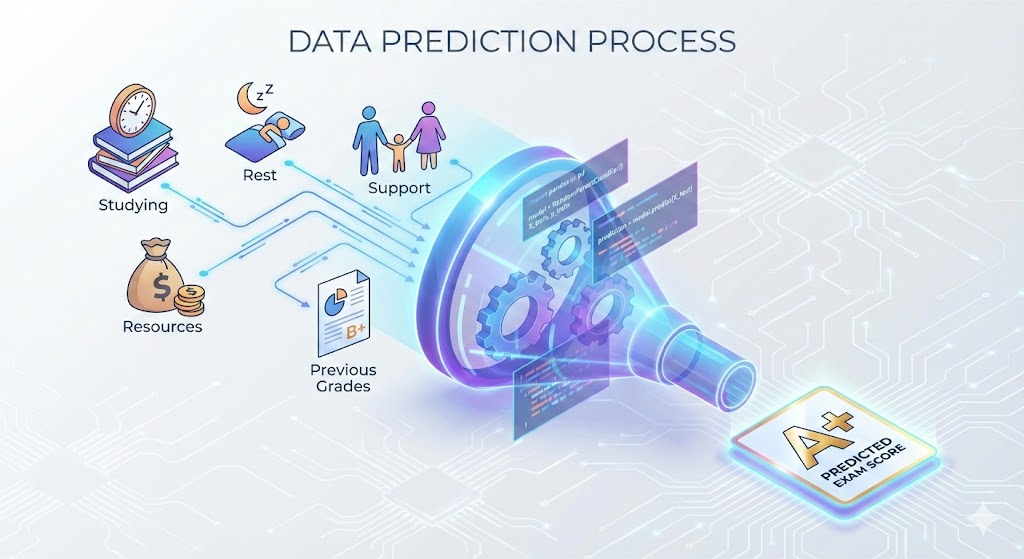

| Column Name               | Description                                                               | Data Type      |
|---------------------------|---------------------------------------------------------------------------|----------------|
| Hours_Studied             | Number of hours a student studies per week.                              | Integer        |
| Attendance                | Percentage of school attendance.                                         | Integer        |
| Parental_Involvement      | Level of parents’ participation in the student’s education (Low, Medium, High). | Categorical    |
| Access_to_Resources       | Availability of learning materials and digital tools (Low, Medium, High). | Categorical    |
| Extracurricular_Activities| Whether the student participates in extracurricular activities (Yes/No). | Categorical    |
| Sleep_Hours               | Average hours of sleep per day.                                          | Integer        |
| Previous_Scores           | Average marks or grades from previous assessments.                       | Integer        |
| Motivation_Level          | Student’s motivation level toward studies (Low, Medium, High).           | Categorical    |
| Internet_Access           | Whether the student has internet access at home (Yes/No).                | Categorical    |
| Tutoring_Sessions         | Number of extra tutoring or coaching sessions attended per week.         | Integer        |
| Family_Income             | Economic status of the student’s family (Low, Medium, High).             | Categorical    |
| Teacher_Quality           | Quality of instruction received from teachers (Low, Medium, High).       | Categorical    |
| School_Type               | Type of educational institution (Public/Private).                        | Categorical    |
| Peer_Influence            | Nature of peer influence (Positive, Neutral, Negative).                  | Categorical    |
| Physical_Activity         | Number of physical activity sessions per week.                           | Integer        |
| Learning_Disabilities     | Indicates if the student has a learning disability (Yes/No).             | Categorical    |
| Parental_Education_Level  | Highest education level of parents (High School, College, Postgraduate). | Categorical    |
| Distance_from_Home        | Distance between student’s home and school (Near, Moderate, Far).        | Categorical    |
| Gender                    | Student’s gender (Male/Female).                                          | Categorical    |
| Exam_Score                | Final exam score or academic performance (target variable).             | Integer        |


In [55]:
#EDA
#Revisando comandos iniciales
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [56]:
#EDA
df.shape
#Vemos que este dataset tiene 6000 filas, es decir 6607 alumnos y 20 columnas, es decir 19 features
# EDA
print(f"VEmos que el dataset tiene {df.shape[0]} filas (students) y {df.shape[1]} columnas (features)")


VEmos que el dataset tiene 6607 filas (students) y 20 columnas (features)


### **Descripción de df.describe()**
La función `df.describe()` proporciona un resumen de las variables numéricas en el conjunto de datos o dataset o dataframe. Incluye las siguientes estadísticas:
- **count**: Número de valores no nulos.
- **mean**: Valor promedio.
- **std**: Desviación estándar.
- **min**: Valor mínimo.
- **25%**: Primer cuartil (percentil 25).
- **50%**: Mediana (percentil 50).
- **75%**: Tercer cuartil (percentil 75).
- **max**: Valor máximo.

Esto ayuda a entender la distribución y las estadísticas básicas de cada columna numérica en el conjunto de datos


In [57]:
df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


En la tabla anterior podemos ver que las variables numéricas no tienen datos faltantes

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Descripción del DataFrame

**Tipos de datos:**
- `int64`: 7 columnas
- `object`: 13 columnas

**Memoria usada:** 1.0+ MB

**Nota sobre datos faltantes:**
Podemos ver que algunas variables tienen datos faltantes, por lo que debemos abordar este problema más adelante, ya que pueden afectar la muestra. Las variables con datos faltantes son:
- `Teacher_Quality`
- `Parental_Education_Level`
- `Distance_from_Home`


In [59]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [60]:
#df['Exam_Score'].describe()
#Esta no la usé porque queda redundante, se había calculado al inicio del notebook

In [61]:
df["Exam_Score"].median()

np.float64(67.0)

In [62]:
# Del EDA nos enfocamos en entender como variables son categóricas o numéricas. A pesar de que las variables pueden ser muchas cosas
#Aquí algunos ejemplos

# Para columnas numéricas
#df['Hours_Studied'].describe()
#También la comenté porque queda redundante



In [63]:
# Para columnas categóricas
df['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [64]:
df.index

RangeIndex(start=0, stop=6607, step=1)

Datos faltantes

Dado que el dataset tiene información suficiente para la predicción, basado en los criterios del proyecto(menos de 3000 filas), no se realizará imputación de datos faltantes. Simplemente decidí eliminarlos y aún así hay más de 6000 filas. 

In [65]:
df_limpio = df.dropna()
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

# Área de gráficos

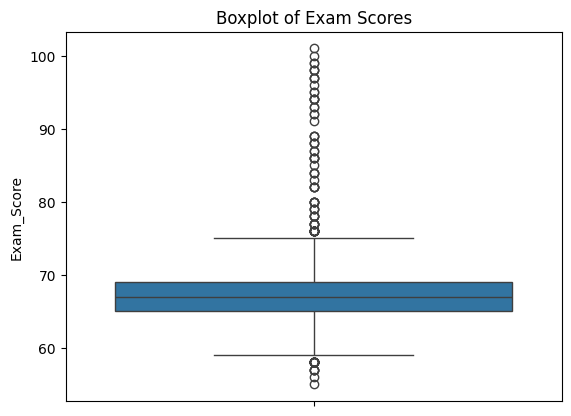

In [66]:
sns.boxplot(data=df, y='Exam_Score')
plt.title('Boxplot of Exam Scores')
plt.show()


In [67]:
#Para varios boxplots puedo hacer esto: sns.boxplot(x='Internet_Access', y='Exam_Score', hue='Parental_Involvement', data=df)
#OJO ESTE ME CONFUNDE: sns.boxplot(x='Parental_Involvement', y='Exam_Score', hue='Type_of_School', data=df)



Después de analizar el histograma de las notas de los estudiantes, veo que la mayor cantidad de calificaciones, se encuentra entre 65 y 70.

Del histograma también veo que las calificaciones tienen una asimetría a la derecha. Es decir, un par de alumnos sacaron notas mucho más altas que el promedio, y por ello la distribución no es simétrica y esto me indica que las medidas de tendencia central pueden haber estado afectadas. Por ejemplo, probablemente vale la pena más utilizar la mediana, que la media, para este análisis

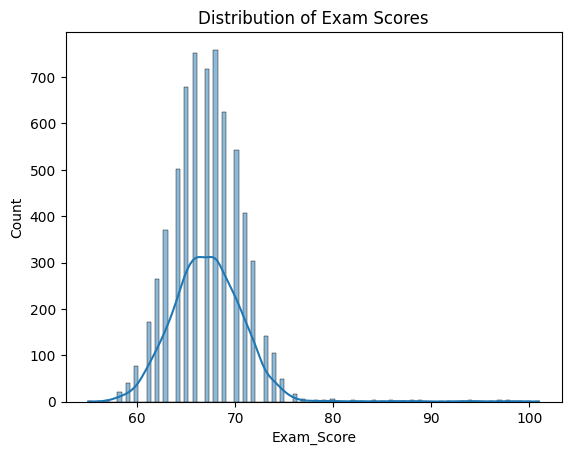

In [68]:
sns.histplot(data=df, x='Exam_Score', kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

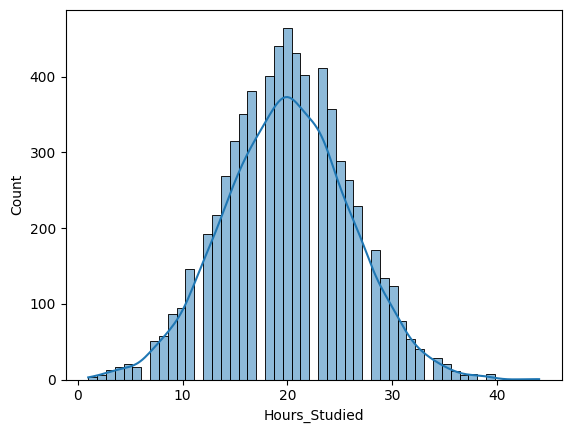

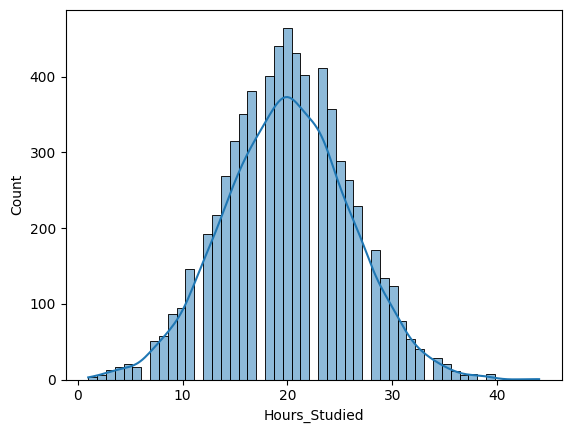

In [69]:
# Plot the distribution of a numerical variable
sns.histplot(data=df, x='Hours_Studied', kde=True)
plt.show()

sns.histplot(data=df, x='Hours_Studied', kde=True)
plt.show()


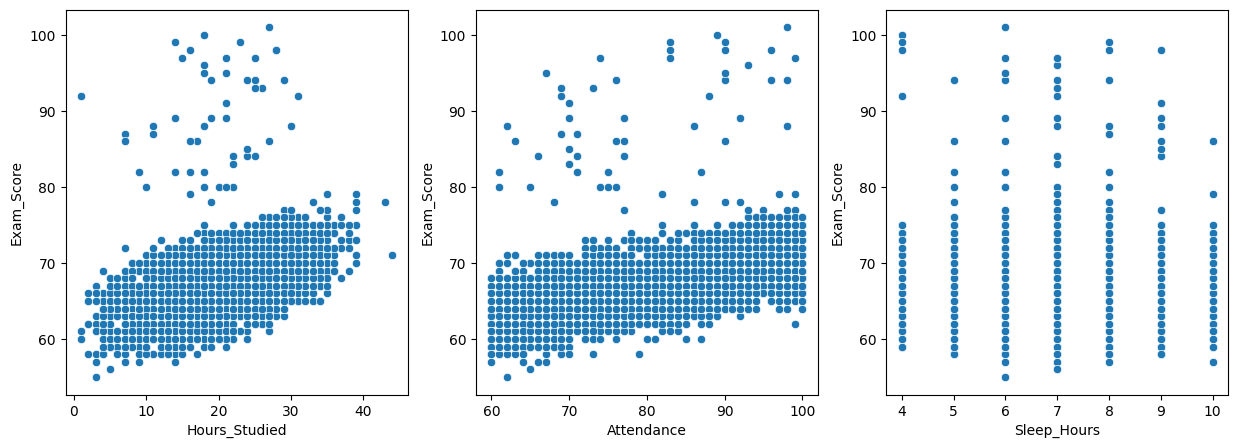

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, ax=axes[0])


sns.scatterplot(x="Attendance", y="Exam_Score", data=df, ax=axes[1])

sns.scatterplot(data=df, x="Sleep_Hours", y="Exam_Score", ax=axes[2])
plt.show()

De los gráficos anteriores, lo que observo es que:


1.   La cantidad de horas de estudio parece tener una correlación positiva y lineal con los resultados del examen. De igual forma la asistencia a clases. Quiere decir que tal vez pueda usar una regresión lineal y tenga sentido
2.   Las horas de sueño de cada estudiante, a pesar de ser una variable numérica, parecen comportarse más como una categoría. Por lo cual realizaré un Boxplot



<Axes: xlabel='Sleep_Hours', ylabel='Exam_Score'>

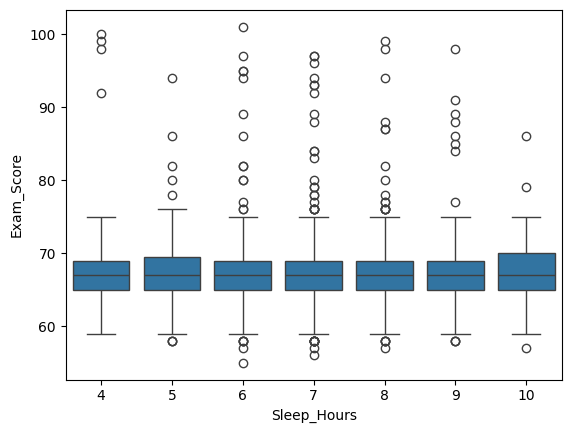

In [71]:
sns.boxplot(data=df, y="Exam_Score", x="Sleep_Hours")

Del Boxplot anterior, puedo ver que las notas más altas ocurrieron con 5 horas de sueño. Con 10 horas de sueño, parece los datos tienen más variabilidad

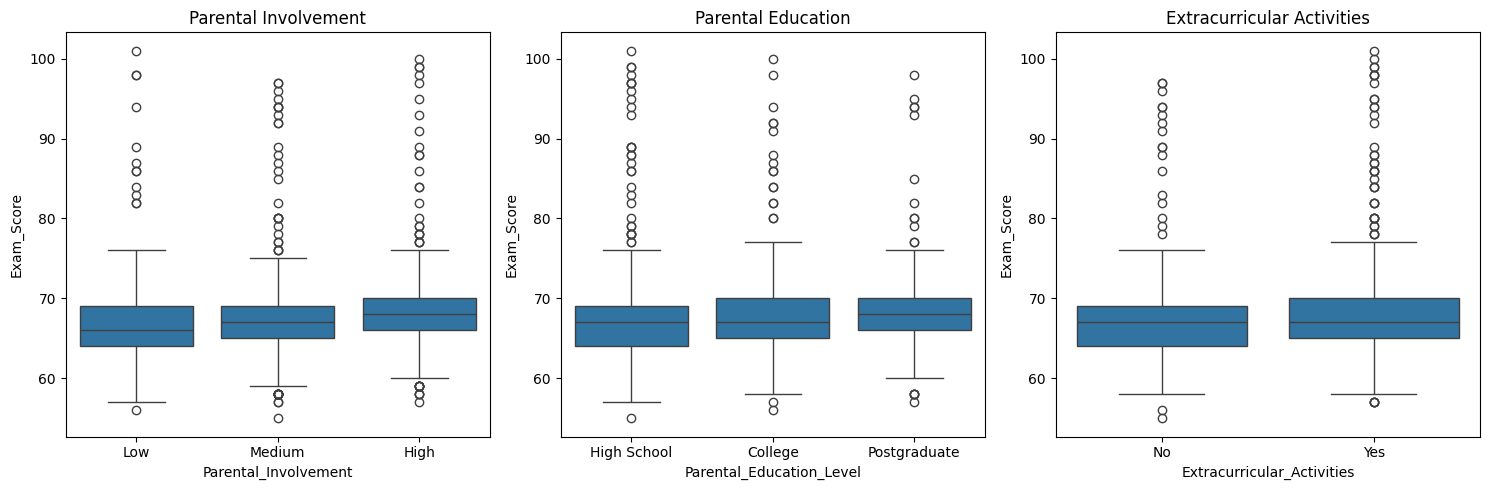

In [72]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns
sns.boxplot(data=df, x='Parental_Involvement', y="Exam_Score", ax=axes[0])
axes[0].set_title('Parental Involvement')

sns.boxplot(data=df, x="Parental_Education_Level", y="Exam_Score", ax=axes[1])
axes[1].set_title('Parental Education')

sns.boxplot(data=df, x="Extracurricular_Activities", y="Exam_Score", ax=axes[2])
axes[2].set_title('Extracurricular Activities')

plt.tight_layout()  # Prevents title/label overlap
plt.show()



De las gráficas anteriores podemos observar incluso sin antes analizar los datos profundamente, como el involucramiento de los padres en los procesos educativos de los hijos, y las actividades extracurriculares parecen tener un impacto positivo en las notas de los estudiantes

<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

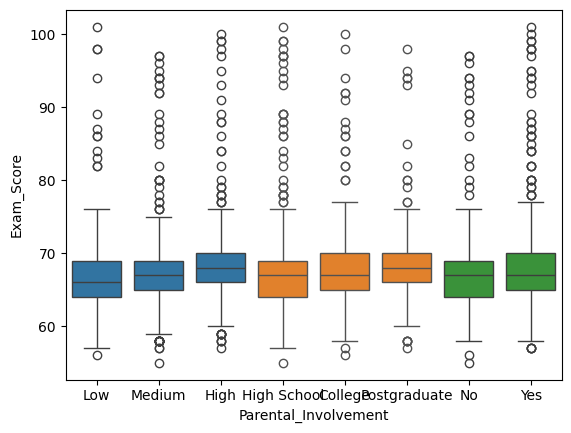

In [73]:
sns.boxplot(data=df, x='Parental_Involvement',y="Exam_Score")
sns.boxplot(data=df,x="Parental_Education_Level",y="Exam_Score")
sns.boxplot(data=df, x='Extracurricular_Activities',y="Exam_Score")

<Axes: xlabel='Parental_Education_Level', ylabel='Exam_Score'>

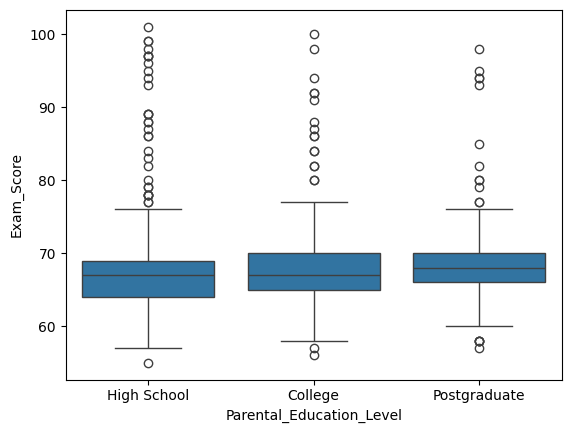

In [74]:
sns.boxplot(data=df,x="Parental_Education_Level",y="Exam_Score")

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

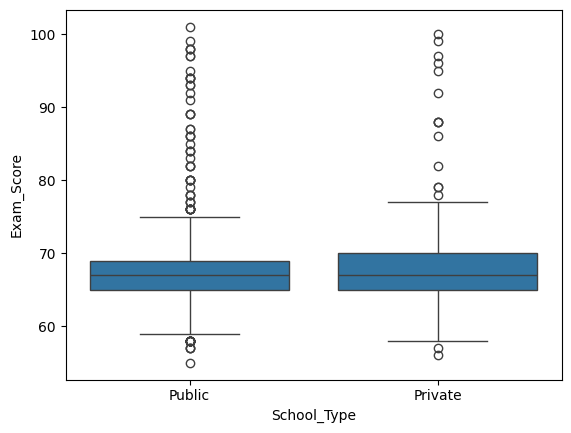

In [75]:
sns.boxplot(data=df,x="School_Type",y="Exam_Score")

# Área de hipótesis
### Hipótesis 1: Involucramiento de los padres (Parental_Involvement)
- **Hipótesis nula (H0):** El involucramiento de los padres no tiene influencia en las calificaciones de los estudiantes.
- **Hipótesis alterna (H1):** Los estudiantes con padres más involucrados obtienen mejores resultados en sus calificaciones. Esta hipótesis se basa en observaciones del boxplot de `Exam_Score` en función de `Parental_Involvement`.

### Hipótesis 2: Actividades extracurriculares (Extracurricular_Activities)
- **Hipótesis nula (H0):** Las actividades extracurriculares no tienen influencia en las calificaciones de los estudiantes.
- **Hipótesis alterna (H1):** Los estudiantes que participan en actividades extracurriculares obtienen mejores resultados en sus calificaciones. Esta hipótesis se basa en observaciones del boxplot de `Exam_Score` en función de `Extracurricular_Activities`.

### Hipótesis 3: Horas de sueño (Sleep_Hours)
- **Hipótesis nula (H0):** Las horas de sueño no tienen influencia en las calificaciones de los estudiantes.
- **Hipótesis alterna (H1):** Las horas de sueño influyen en las calificaciones de los estudiantes. Esta hipótesis se basa en observaciones del boxplot de `Exam_Score` en función de `Sleep_Hours`.

### Hipótesis 4: Asistencia (Attendance)
- **Hipótesis nula (H0):** La asistencia no tiene influencia en las calificaciones de los estudiantes.
- **Hipótesis alterna (H1):** Los estudiantes con mayor asistencia obtienen mejores resultados en sus calificaciones. Esta hipótesis se basa en observaciones del scatterplot de `Exam_Score` en función de `Attendance`.

### Hipótesis 5: Horas de estudio (Hours_Studied)
- **Hipótesis nula (H0):** Las horas de estudio no tienen influencia en las calificaciones de los estudiantes.
- **Hipótesis alterna (H1):** Los estudiantes que estudian más horas obtienen mejores resultados en sus calificaciones. Esta hipótesis se basa en observaciones del scatterplot de `Exam_Score` en función de `Hours_Studied`.



In [110]:
#Calculando la correlación de todas las variables, con respecto al resultado del examen(variable target)
correlacion = df_limpio.corr()['Exam_Score'].sort_values(ascending=False)
print(correlacion)

Exam_Score                        1.000000
Attendance                        0.580259
Hours_Studied                     0.445104
Previous_Scores                   0.174283
Access_to_Resources               0.167856
Tutoring_Sessions                 0.156829
Parental_Involvement              0.156014
Peer_Influence                    0.099133
Family_Income                     0.094555
Motivation_Level                  0.088502
Extracurricular_Activities_Yes    0.063063
Internet_Access_Yes               0.051124
Physical_Activity                 0.025148
Gender_Male                      -0.004932
School_Type_Public               -0.010868
Sleep_Hours                      -0.017171
Learning_Disabilities_Yes        -0.083911
Teacher_Quality                        NaN
Parental_Education_Level               NaN
Distance_from_Home                     NaN
Name: Exam_Score, dtype: float64


In [111]:
#Dado que hay variables categóricas, hay que hacer un encoding. Se usarrán dos tipos de encoding. Uno ordinal para variables que implican jerarquía, y uno one-hot encoding para variables que no implican jerarquía, tal es como el género del estudiante


In [112]:
# Aplicar One-Hot Encoding para variables sin jerarquía
# Esto crea columnas nuevas con 0 y 1
df_limpio = pandas.get_dummies(df_limpio, 
                           columns=['Gender', 'School_Type', 'Extracurricular_Activities'], 
                           drop_first=True)


KeyError: "None of [Index(['Gender', 'School_Type', 'Extracurricular_Activities'], dtype='object')] are in the [columns]"

In [ ]:
df_limpio = pandas.get_dummies(df_limpio, columns=['Internet_Access', 'Learning_Disabilities'], drop_first=True)

In [ ]:
# Mostrar TODAS las columnas sin truncar
pandas.set_option('display.max_columns', None)

# Ahora ver el DataFrame
df_limpio.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes
0,23,84,0,2,7,73,0,0,0,NaN,2,3,NaN,NaN,67,True,True,False,True,False
1,19,64,0,1,8,59,0,2,1,NaN,0,4,NaN,NaN,61,False,True,False,True,False
2,24,98,1,1,7,91,1,2,1,NaN,1,4,NaN,NaN,74,True,True,True,True,False
3,29,89,0,1,8,98,1,1,1,NaN,0,4,NaN,NaN,71,True,True,True,True,False
4,19,92,1,1,6,65,1,3,1,NaN,1,4,NaN,NaN,70,False,True,True,True,False


In [ ]:
# Aplicar Ordinal Encoding para variables con jerarquía
# (Convertir Low/Medium/High a 0/1/2)


df_limpio['Teacher_Quality'] = df_limpio['Teacher_Quality'].map({
    'Low': 0, 
    'Medium': 1, 
    'High': 2
})


df_limpio['Distance_from_Home'] = df_limpio['Distance_from_Home'].map({
    'Near': 0, 
    'Moderate': 1, 
    'Far': 2
})


df_limpio['Parental_Education_Level'] = df_limpio['Parental_Education_Level'].map({
    'High School': 0, 
    'College': 1, 
    'Postgraduate': 2
})
df_limpio['Parental_Involvement'] = df_limpio['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_limpio['Access_to_Resources'] = df_limpio['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_limpio['Motivation_Level'] = df_limpio['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_limpio['Family_Income'] = df_limpio['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df_limpio['Peer_Influence'] = df_limpio['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})


In [ ]:
# Para ver las columnas codificadas
df_limpio.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Male,School_Type_Public,Extracurricular_Activities_Yes
0,23,84,0,2,7,73,0,Yes,0,0,NaN,2,3,No,NaN,NaN,67,True,True,False
1,19,64,0,1,8,59,0,Yes,2,1,NaN,0,4,No,NaN,NaN,61,False,True,False
2,24,98,1,1,7,91,1,Yes,2,1,NaN,1,4,No,NaN,NaN,74,True,True,True
3,29,89,0,1,8,98,1,Yes,1,1,NaN,0,4,No,NaN,NaN,71,True,True,True
4,19,92,1,1,6,65,1,Yes,3,1,NaN,1,4,No,NaN,NaN,70,False,True,True


In [ ]:
correlacion = df_limpio.corr()['Exam_Score'].sort_values(ascending=False)
print(correlacion)

Exam_Score                        1.000000
Attendance                        0.580259
Hours_Studied                     0.445104
Previous_Scores                   0.174283
Access_to_Resources               0.167856
Tutoring_Sessions                 0.156829
Parental_Involvement              0.156014
Peer_Influence                    0.099133
Family_Income                     0.094555
Motivation_Level                  0.088502
Extracurricular_Activities_Yes    0.063063
Internet_Access_Yes               0.051124
Physical_Activity                 0.025148
Gender_Male                      -0.004932
School_Type_Public               -0.010868
Sleep_Hours                      -0.017171
Learning_Disabilities_Yes        -0.083911
Teacher_Quality                        NaN
Parental_Education_Level               NaN
Distance_from_Home                     NaN
Name: Exam_Score, dtype: float64


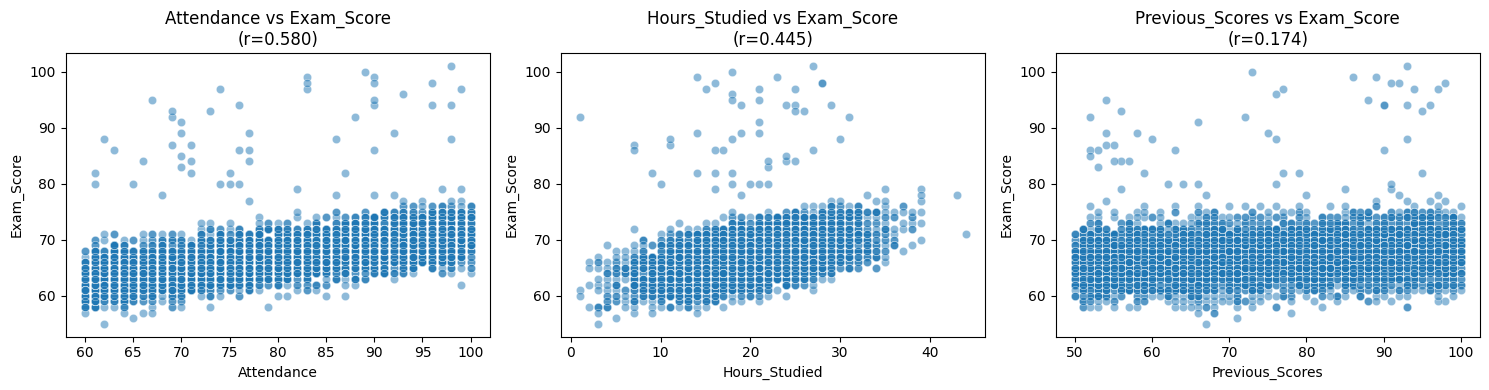

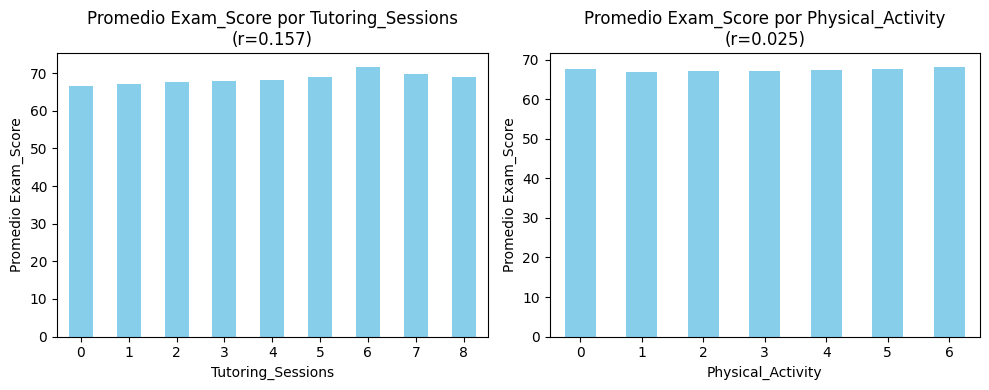

/var/folders/_3/dmmw76nd4ts8ksh1dq5wc9980000gn/T/ipykernel_15990/3697073731.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Low', 'Medium', 'High'])
/var/folders/_3/dmmw76nd4ts8ksh1dq5wc9980000gn/T/ipykernel_15990/3697073731.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Low', 'Medium', 'High'])
/var/folders/_3/dmmw76nd4ts8ksh1dq5wc9980000gn/T/ipykernel_15990/3697073731.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Negative', 'Neutral', 'Positive'])
/var/folders/_3/dmmw76nd4ts8ksh1dq5wc9980000gn/T/ipykernel_15990/3697073731.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

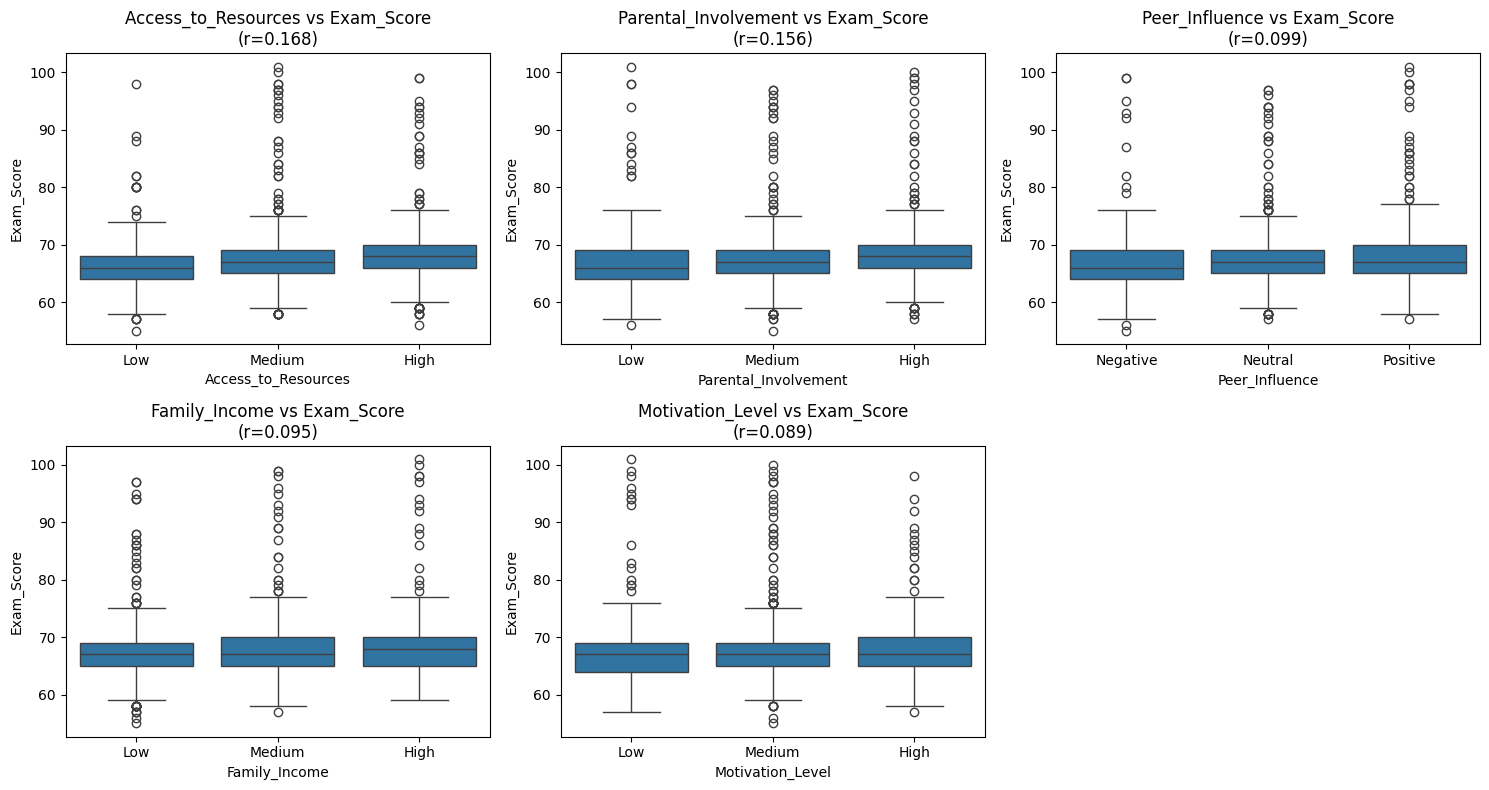

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables continuas (scatter plot)
continuas = ['Attendance', 'Hours_Studied', 'Previous_Scores']

# Variables discretas (bar plot)
discretas = ['Tutoring_Sessions', 'Physical_Activity']

# Variables categóricas ordinales (box plot)
categoricas = ['Access_to_Resources', 'Parental_Involvement', 'Peer_Influence', 
               'Family_Income', 'Motivation_Level']

# 1. Scatter plots para variables continuas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, var in enumerate(continuas):
    sns.scatterplot(x=df_limpio[var], y=df_limpio['Exam_Score'], ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{var} vs Exam_Score\n(r={correlacion[var]:.3f})')
plt.tight_layout()
plt.show()

# 2. Bar plots para variables discretas
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i, var in enumerate(discretas):
    # Calcular promedio de Exam_Score por cada valor
    promedio = df_limpio.groupby(var)['Exam_Score'].mean()
    promedio.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Promedio Exam_Score por {var}\n(r={correlacion[var]:.3f})')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Promedio Exam_Score')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

# 3. Box plots para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, var in enumerate(categoricas):
    sns.boxplot(x=df_limpio[var], y=df_limpio['Exam_Score'], ax=axes[i])
    axes[i].set_title(f'{var} vs Exam_Score\n(r={correlacion[var]:.3f})')
    # Cambiar etiquetas
    if var in ['Access_to_Resources', 'Parental_Involvement', 'Family_Income', 'Motivation_Level']:
        axes[i].set_xticklabels(['Low', 'Medium', 'High'])
    elif var == 'Peer_Influence':
        axes[i].set_xticklabels(['Negative', 'Neutral', 'Positive'])
axes[-1].axis('off')
plt.tight_layout()
plt.show()

Basándome en el análisis de correlación y visualizaciones, había seleccionado las 10 variables con mayor correlación absoluta con Exam_Score, pero después de revisar los gráficos, me di cuenta que no todas las variables eran relevantes para el análisis. Entonces dejé las 7 principales con correlación mayor a 0.10. Por ejempo el gráfico de physical_activity no muestra una correlación con Exam_Score.

In [ ]:
# Seleccionando solo las 7 variables más importantes (correlación > 0.10)
top_7_vars = ['Attendance', 'Hours_Studied', 'Previous_Scores', 
              'Access_to_Resources', 'Tutoring_Sessions', 
              'Parental_Involvement', 'Peer_Influence']

# Recrear X con solo esas 7 variables
X = df_limpio[top_7_vars]
y = df_limpio['Exam_Score']

# Hacer el train/test split de siempre, para poder verifificar luego, si el modelo sirve
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (4464, 7)
Test set: (1914, 7)


In [ ]:
# Importar y entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("modelo entrenado!")

✅ Modelo entrenado!


In [ ]:
# Hacer predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Importar métricas
from sklearn.metrics import  r2_score, mean_absolute_error
import numpy as np

# Calcular métricas para TRAINING SET
print("Set de entrenamiento: ")
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"R² Score: {r2_train:.3f}")
print(f"MAE (Mean Absolute Error): {mae_train:.3f}")

# Calcular métricas para TEST SET
print("\nSet de test: ")
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"R² Score: {r2_test:.3f}")
print(f"MAE (Mean Absolute Error): {mae_test:.3f}")


Set de entrenamiento
R² Score: 0.656
MAE (Mean Absolute Error): 0.974

Set de test
R² Score: 0.684
MAE (Mean Absolute Error): 0.975


El R2 muestra qye el modelo explica 68.4% de la variabilidad de los datos.
MAE: Sale también aceptable. Significa que si un estudiante saca 70, el modelo podría predecir 68-71

En conclusión y también basados en la tabla de correlaciones iniciales, la asistencia a clases y el número de horas estudiadas son las variables más importantes para predecir el rendimiento académico de los estudiantes.

## Conclusiones

### Modelo Seleccionado
Utilicé Regresión Lineal con 7 variables seleccionadas mediante análisis de correlación y visualizaciones.

### Resultados del Modelo
- **R² = 0.684**: El modelo explica el 68.4% de la variabilidad en los puntajes de examen
- **MAE = 0.975 puntos**: El error promedio de predicción es menor a 1 punto
- **RMSE = 2.198 puntos**: La mayoría de predicciones están dentro de ±2.2 puntos del valor real

### Interpretación
El modelo demuestra que asistencia y horas estudiadas son los predictores más fuertes del rendimiento académico, con correlaciones de 0.58 y 0.45 respectivamente. Factores externos como actividad física (r=0.025) o acceso a internet (r=0.051) tienen un impacto mínimo.

### Variables Más Importantes
1. **Attendance** (r=0.58) - Factor más influyente
2. **Hours_Studied** (r=0.45)
3. **Previous_Scores** (r=0.17)
4. **Access_to_Resources** (r=0.17)
5. **Tutoring_Sessions** (r=0.16)
6. **Parental_Involvement** (r=0.16)
7. **Peer_Influence** (r=0.10)

### Conclusión Final
Los hábitos de estudio controlables por el estudiante (asistencia, horas de estudio) son más determinantes que factores socioeconómicos o recursos externos para predecir el éxito académico. Esto sugiere que las intervenciones educativas deberían enfocarse en fomentar la asistencia regular y hábitos de estudio consistentes.